In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error
import datetime

In [46]:
#loading the dataset
df = pd.read_csv('D://project2//kc_house_data.csv', index_col='id')

In [38]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df['date'] = [datetime.datetime.strptime(x, "%Y%m%dT%H%M%S") for x in df['date']]

In [44]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [45]:
#returns the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

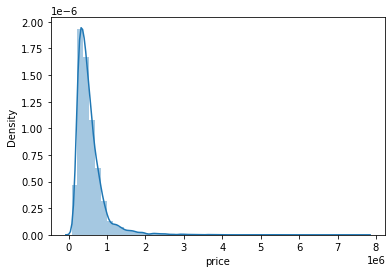

In [43]:
#ploting distributed plot using 'price'
sns.distplot(df.price)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bedrooms'>

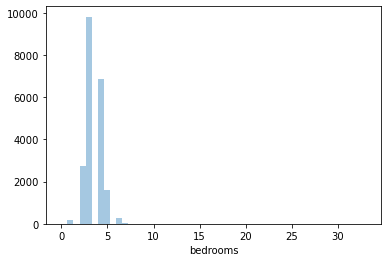

In [47]:
sns.distplot(df.bedrooms, kde=False)

In [11]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [48]:
df.sort_values(by=['bedrooms', 'sqft_living'], ascending=[False, True]).head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
8823901445,20150313T000000,934000.0,9,3.00,2820,4480,2.0,0,0,3,7,1880,940,1918,0,98105,47.6654,-122.307,2460,4400
9822700190,20140808T000000,1280000.0,9,4.50,3650,5000,2.0,0,0,3,8,2530,1120,1915,2010,98105,47.6604,-122.289,2510,5000
2902200015,20150106T000000,700000.0,9,3.00,3680,4400,2.0,0,0,3,7,2830,850,1908,0,98102,47.6374,-122.324,1960,2450
1997200215,20140507T000000,599999.0,9,4.50,3830,6988,2.5,0,0,3,7,2450,1380,1938,0,98103,47.6927,-122.338,1460,6291


In [13]:
df.drop(index=2402100895, inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bedrooms'>

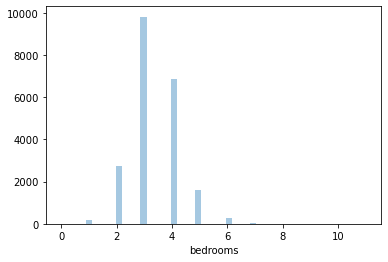

In [14]:
sns.distplot(df.bedrooms, kde=False)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bathrooms'>

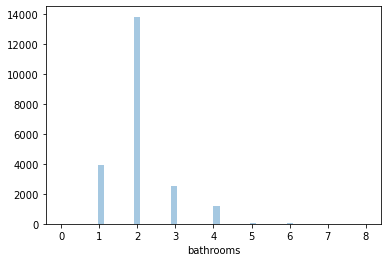

In [49]:

df['bathrooms']=np.round(df['bathrooms'])
sns.distplot(df.bathrooms, kde=False)

In [50]:

pd.Series(['no' if df['yr_renovated'].iloc[i]!=0 & df['yr_renovated'].iloc[i]>df['yr_built'].iloc[i] else 'yes' for i in range(len(df))]).value_counts()

yes    21613
dtype: int64

In [51]:
df.groupby('condition', as_index=False)['price'].mean()

,condition,price
0,1,334431.666667
1,2,327287.145349
2,3,542012.578148
3,4,521200.390033
4,5,612418.089359


<AxesSubplot:xlabel='condition', ylabel='yr_built'>

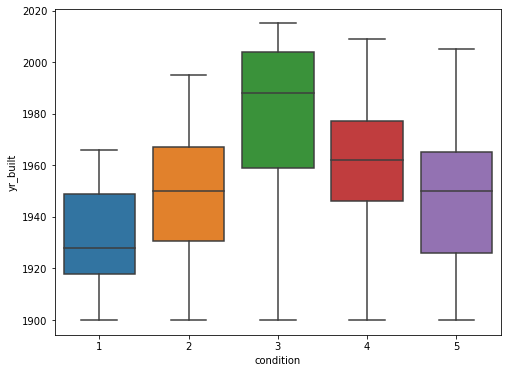

In [52]:
 plt.figure(figsize=(8,6))
sns.boxplot(x='condition', y='yr_built', data=df)

<AxesSubplot:xlabel='condition', ylabel='yr_built'>

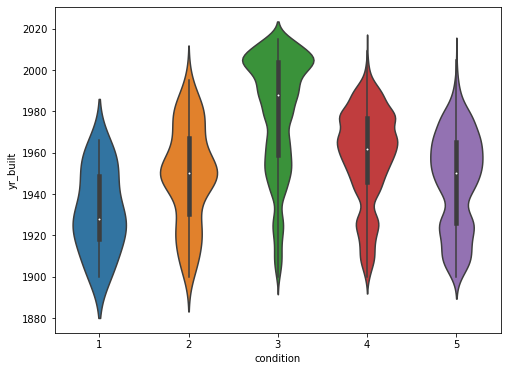

In [19]:
plt.figure(figsize=(8,6))
sns.violinplot(x='condition', y='yr_built', data=df)

<AxesSubplot:>

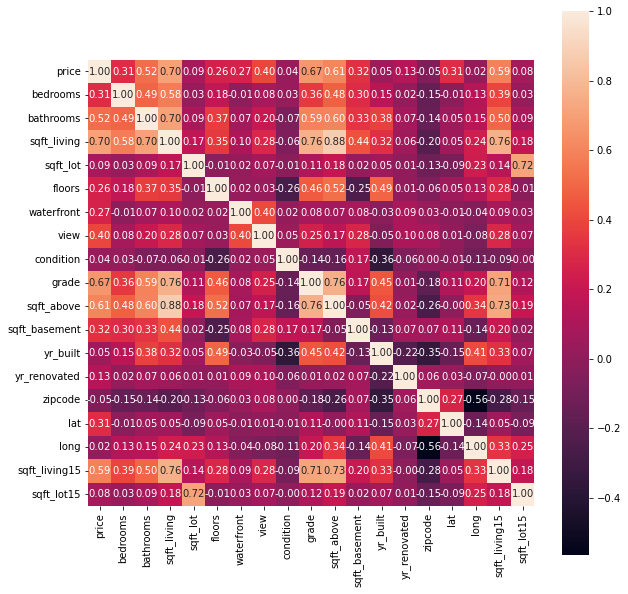

In [53]:
corr_matrix = np.corrcoef(df.drop('date', axis=1).values.T)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data=corr_matrix,
            annot=True,
            square = True,
            fmt='.2f',
            xticklabels=df.drop('date', axis=1).columns,
            yticklabels=df.drop('date', axis=1).columns)

In [54]:
X = df.drop(['date','price'], axis=1)

In [55]:
y = df['price']

In [56]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

# LINEAR REGRESSION

In [57]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [58]:
y_pred = model.predict(X_test)

In [59]:
r2_score(y_test, y_pred)

0.7075317711828266

In [60]:
mean_absolute_error(y_test, y_pred)

128357.4433759661

In [61]:
model.coef_

array([-3.71303344e+04,  3.92815383e+04,  1.10105911e+02,  1.59252800e-01,
        1.22041104e+04,  5.65924100e+05,  5.02179508e+04,  2.74858496e+04,
        9.47516753e+04,  6.78604385e+01,  4.22454712e+01, -2.45017087e+03,
        2.78862063e+01, -5.66529782e+02,  6.01363421e+05, -2.03449140e+05,
        2.57617735e+01, -3.85552264e-01])

In [62]:
model.intercept_

6244516.61358858

# DECISION TREES

In [63]:
model=DecisionTreeRegressor(max_depth=8)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [64]:
y_pred_tree = model.predict(X_test)

In [65]:
r2_score(y_test, y_pred_tree)

0.8085864742410719

In [66]:
mean_absolute_error(y_test, y_pred_tree)

98536.18942644914

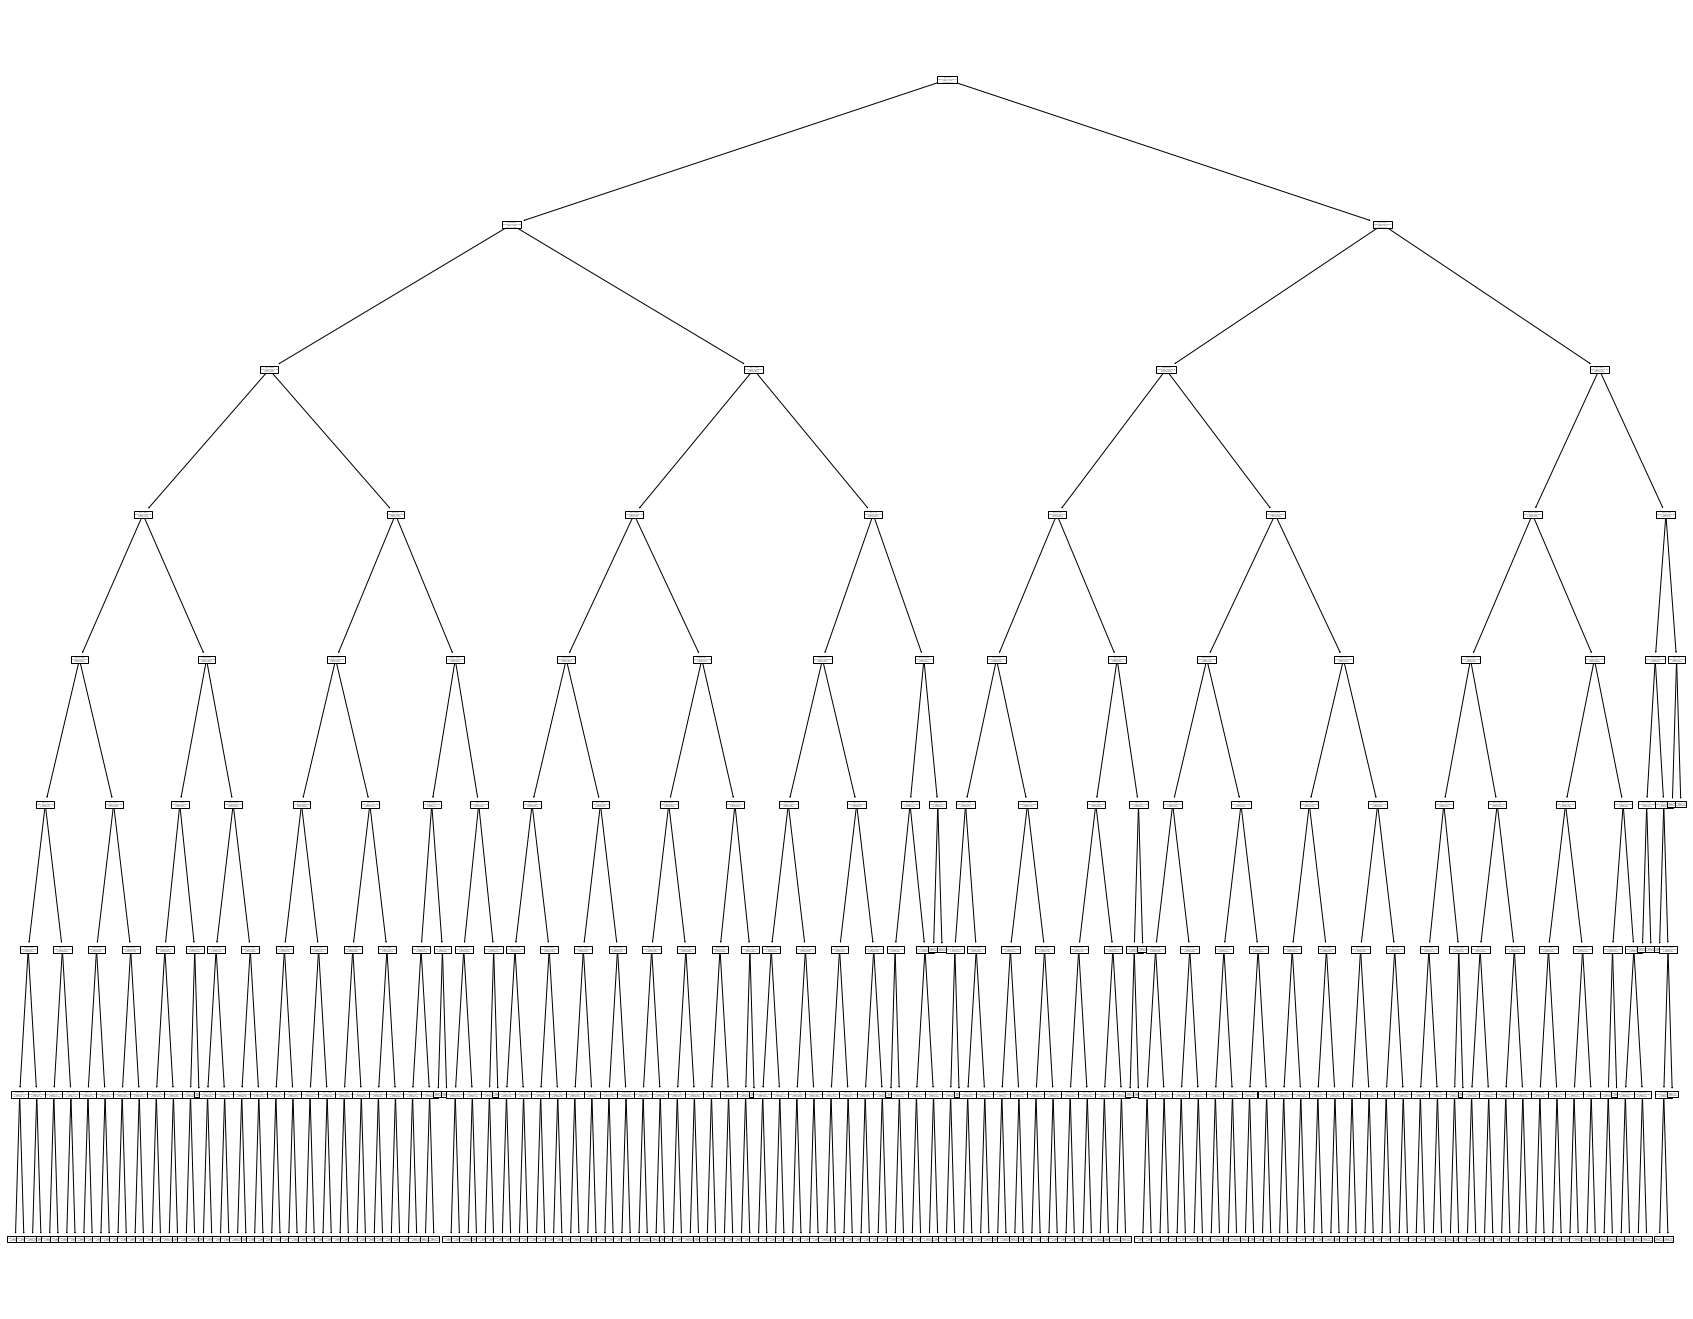

In [67]:
fig, ax=plt.subplots(figsize=(30,24))
ax=tree.plot_tree(model)
plt.show()